<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


In [1]:
# Para no tener que hacer restart con cada actualizacion 

%load_ext autoreload
%autoreload 2



# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)
import pickle

from itertools import product, combinations

from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
import tqdm as tqdm
from scipy.stats import chi2_contingency
import os
import sys 
sys.path.append(os.path.abspath("../src"))   
import Support_ajuste_logistica as f

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek


from sklearn.model_selection import train_test_split,GridSearchCV
# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys




pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('../pickles_general/datos_preprocesados.pkl', 'rb') as r:
    df_preprocesado = pickle.load(r)  

In [3]:
df_preprocesado.head()

,customer_id,merchant_id,amount,is_fraudulent,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,location_City-1,location_City-10,location_City-11,location_City-12,location_City-13,location_City-14,location_City-15,location_City-16,location_City-17,location_City-18,location_City-19,location_City-2,location_City-20,location_City-21,location_City-22,location_City-23,location_City-24,location_City-25,location_City-26,location_City-27,location_City-28,location_City-29,location_City-3,location_City-30,location_City-31,location_City-32,location_City-33,location_City-34,location_City-35,location_City-36,location_City-37,location_City-38,location_City-39,location_City-4,location_City-40,location_City-41,location_City-42,location_City-43,location_City-44,location_City-45,location_City-46,location_City-47,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9
0,0.82,0.26,0.58,0,0.90,0.48,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.14,0.53,0.19,1,0.14,0.83,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.03,0.34,0.12,1,0.90,0.75,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.95,0.36,0.76,1,0.51,0.79,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,0.35,0.83,0.19,1,0.68,0.35,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## LOG REG

In [4]:
# logistic_regression = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': [0.005, 0.01,0.05, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [10,20,40,100,150]
# }

In [5]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "is_fraudulent",train_size=0.8)
modelos_clasificacion.ajustar_modelo("logistic_regression", param_grid=None, cross_validation = 5,scoring="accuracy", ruta_guardar_modelo = "../pickles_general",nombre_modelo_guardar="mejor_modeloTREE.pkl")

-------------------------------------------------
El mejor modelo es:
LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')
-------------------------------------------------
Los parametros actuales son:


{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.01, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [100, 200, 500]}

In [6]:
modelos_clasificacion.calcular_metricas(modelo_nombre="logistic_regression").T

,accuracy,precision,recall,f1,kappa,auc
train,0.52,0.52,0.52,0.51,0.04,0.53
test,0.54,0.54,0.54,0.52,0.06,0.53


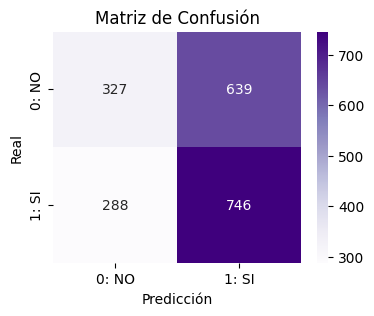

In [7]:
modelos_clasificacion.plot_matriz_confusion("logistic_regression", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

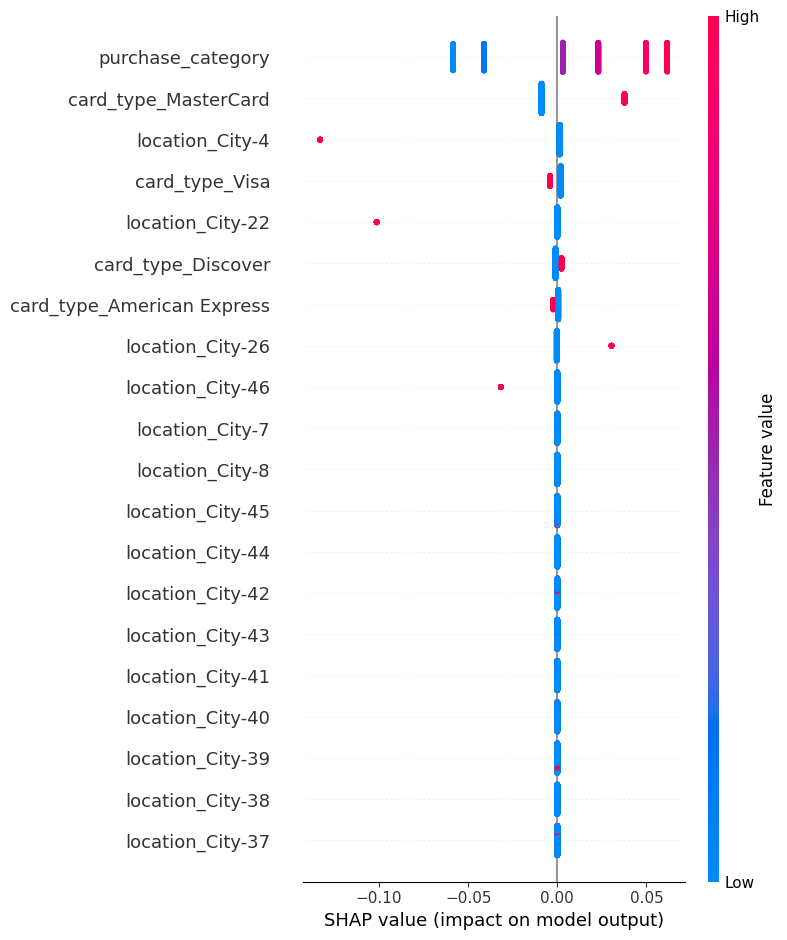

In [8]:
modelos_clasificacion.plot_shap_summary("logistic_regression")

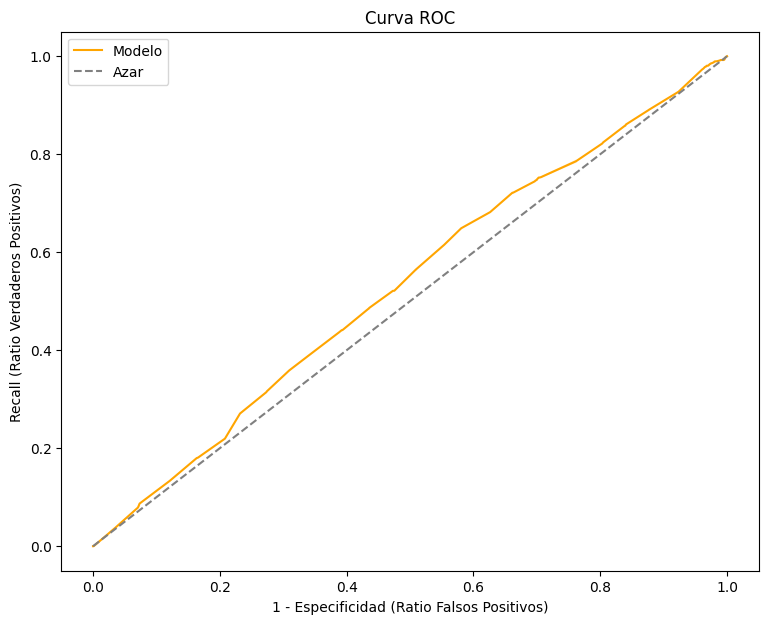

In [9]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

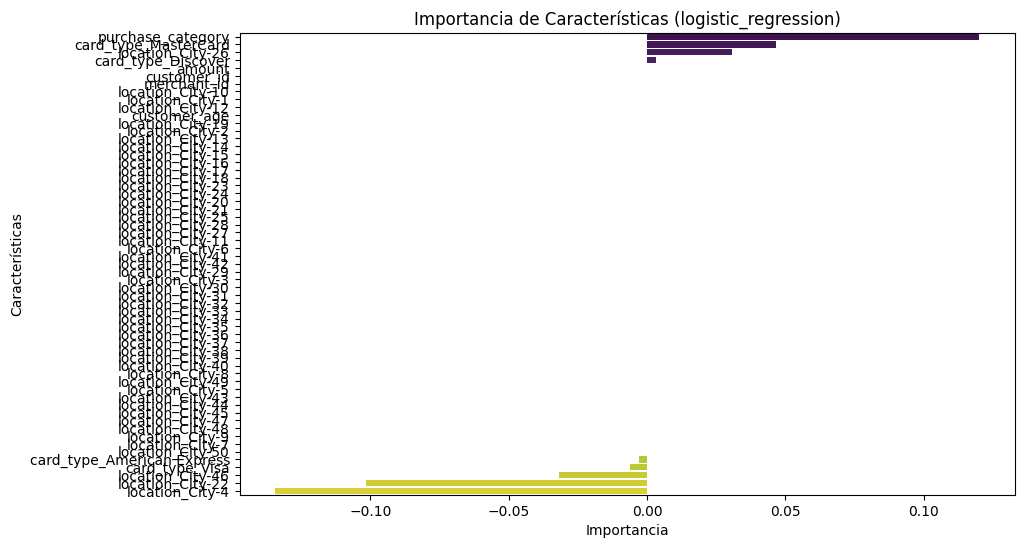

In [10]:
modelos_clasificacion.importancia_predictores("logistic_regression")

## DECISION TREE

In [11]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "is_fraudulent",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 5, 6, 10, 15,20],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [1, 2, 3, 4,5,6]}, cross_validation = 5,scoring="accuracy", ruta_guardar_modelo = "../pickles_general",nombre_modelo_guardar="mejor_modeloTREE.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [12]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.52,0.52,0.52,0.52,0.05,0.54
test,0.52,0.52,0.52,0.52,0.05,0.52


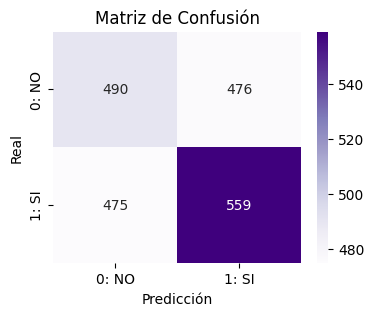

In [13]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

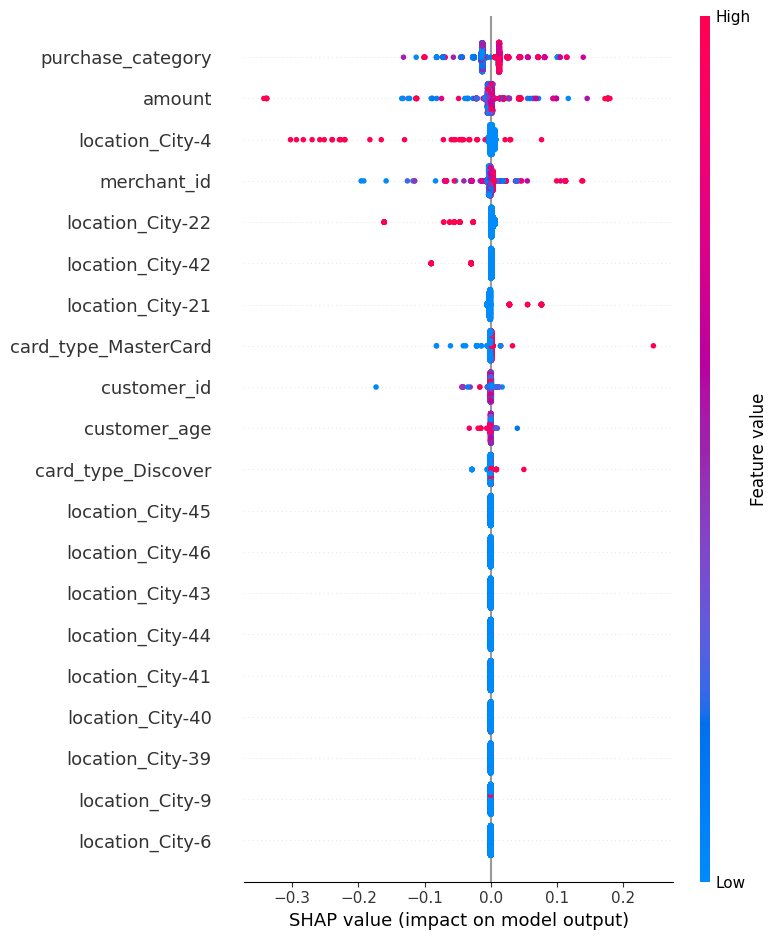

In [14]:
modelos_clasificacion.plot_shap_summary("tree")

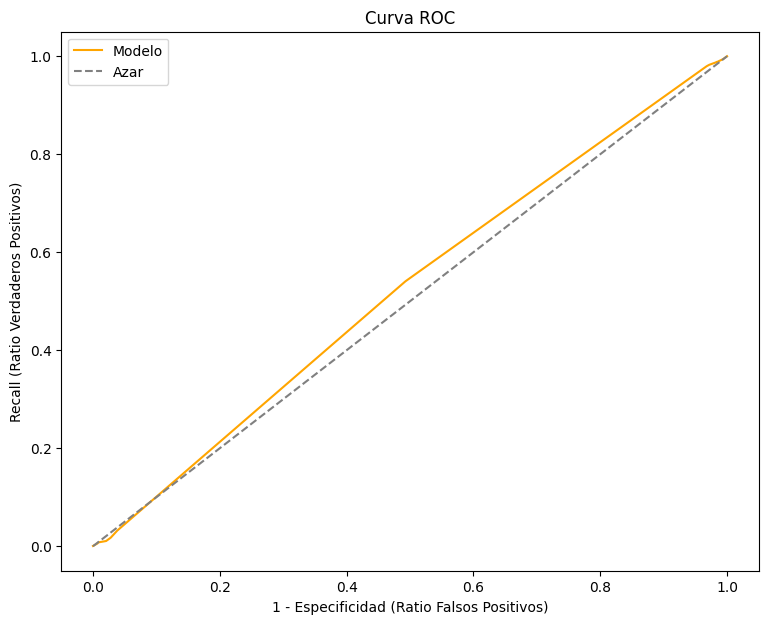

In [15]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

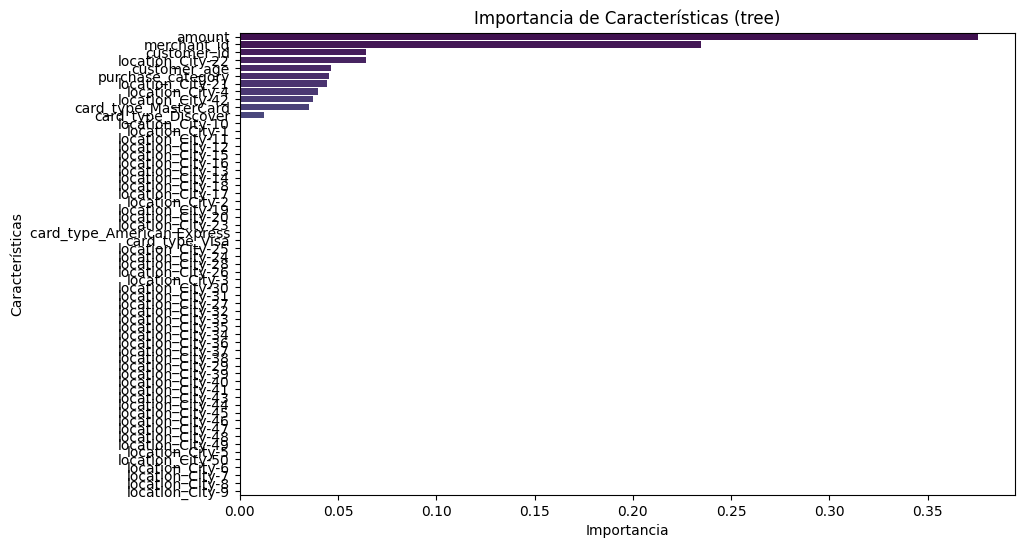

In [16]:
modelos_clasificacion.importancia_predictores("tree")

## RANDOM FOREST

Probar a meter parametros para mejorar

In [17]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "is_fraudulent",train_size=0.8)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid=None, cross_validation = 5,scoring="accuracy", ruta_guardar_modelo = "../pickles_general",nombre_modelo_guardar="mejor_modeloRF.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [18]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.71,0.72,0.71,0.71,0.42,0.79
test,0.52,0.52,0.52,0.52,0.03,0.54


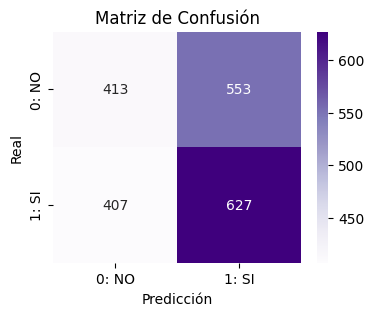

In [19]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

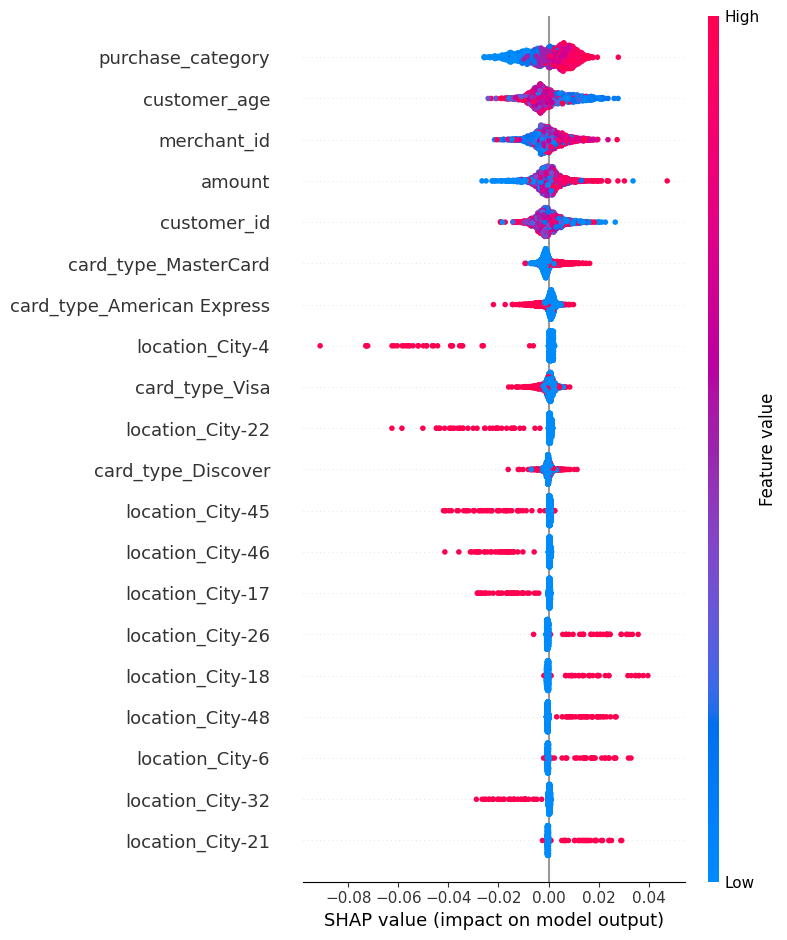

In [20]:
modelos_clasificacion.plot_shap_summary("random_forest")

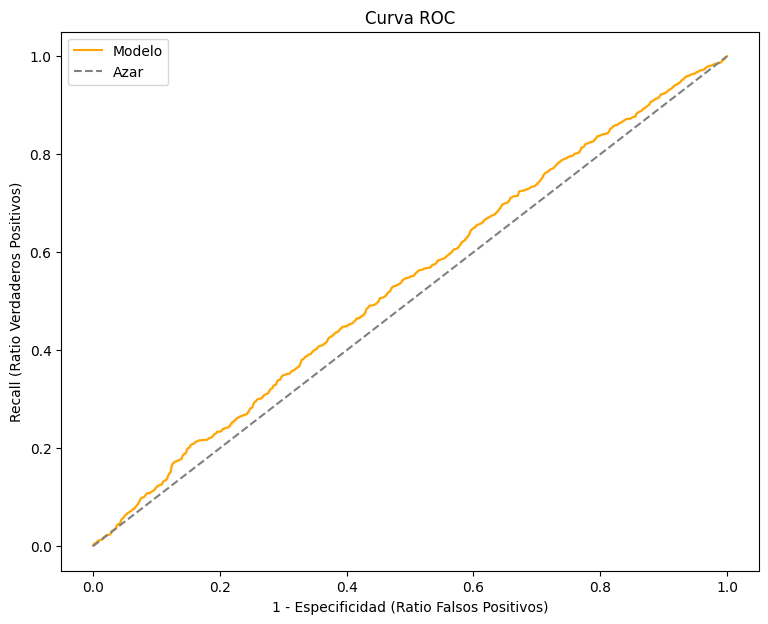

In [21]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

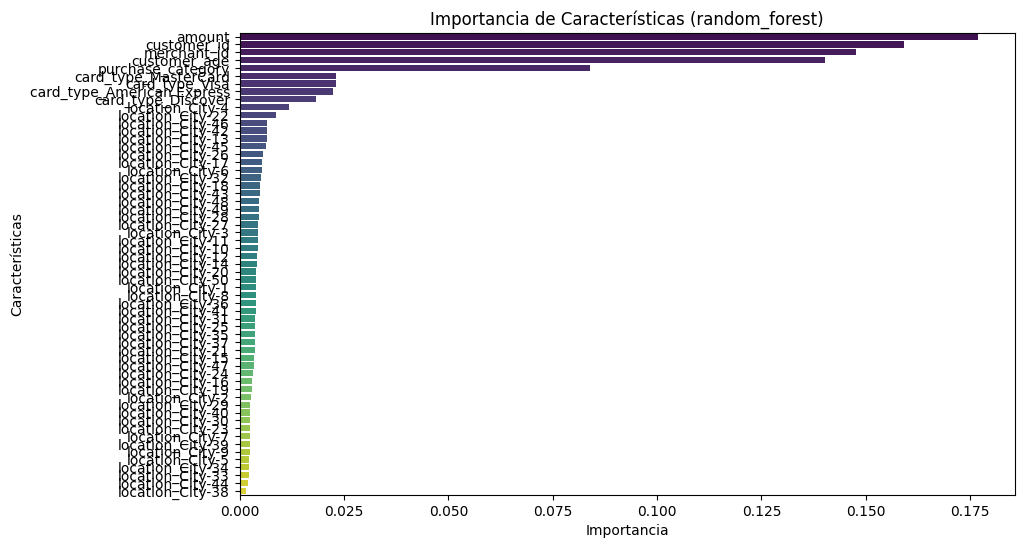

In [22]:
modelos_clasificacion.importancia_predictores("random_forest")

## GRADIENT

In [23]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "is_fraudulent",train_size=0.8)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid=None, cross_validation = 5,scoring="accuracy", ruta_guardar_modelo = "../pickles_general",nombre_modelo_guardar="mejor_modeloGRAD.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                           n_estimators=200, random_state=42, subsample=0.8)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [24]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

[autoreload of Support_ajuste_logistica failed: Traceback (most recent call last):
  File "C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen

,accuracy,precision,recall,f1,kappa,auc
train,0.90,0.90,0.90,0.90,0.79,0.96
test,0.52,0.52,0.52,0.52,0.04,0.53


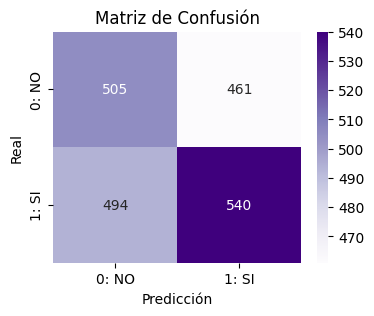

In [25]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

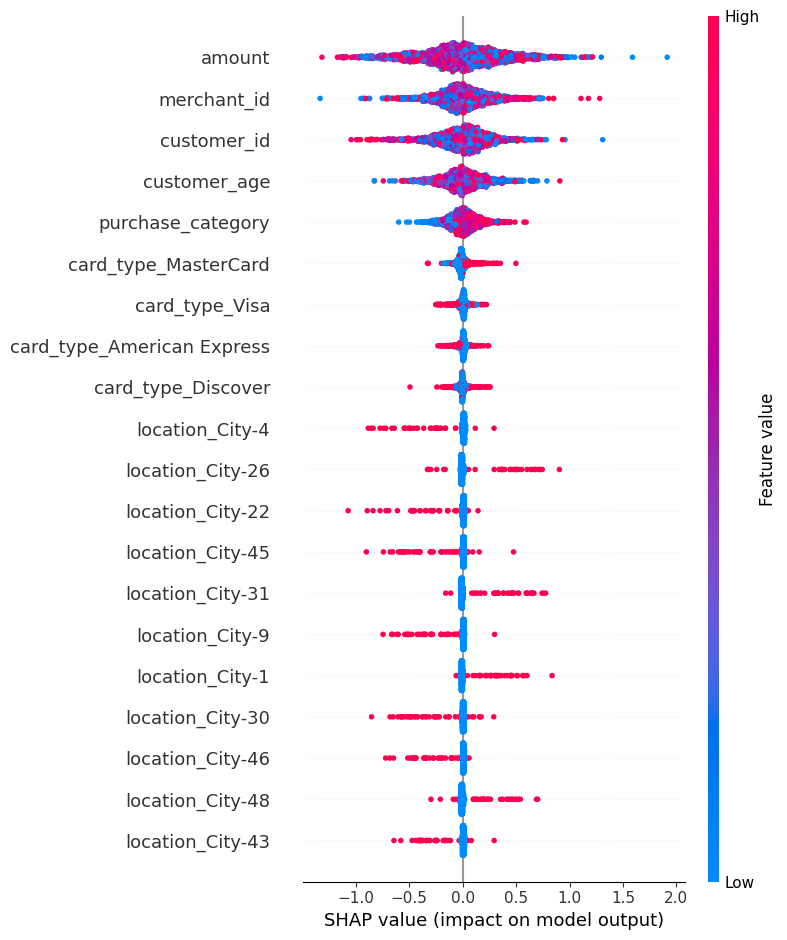

In [26]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

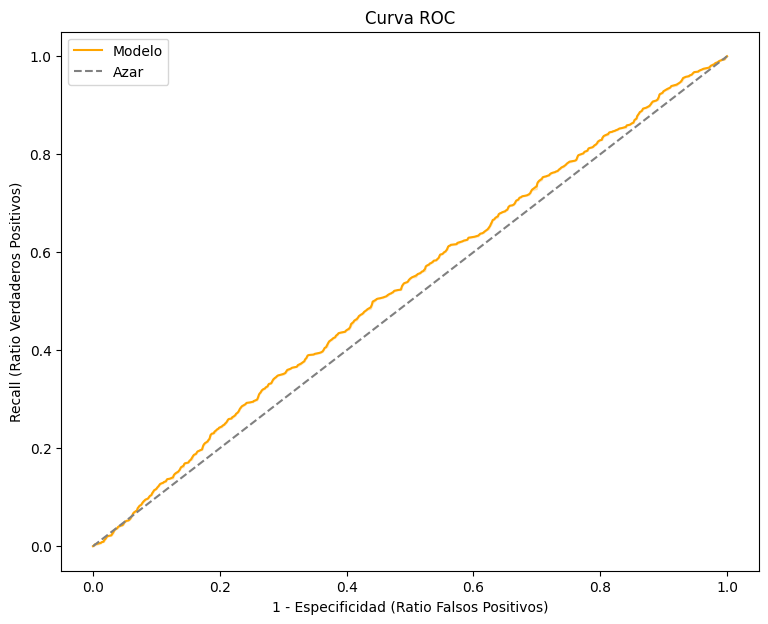

In [27]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

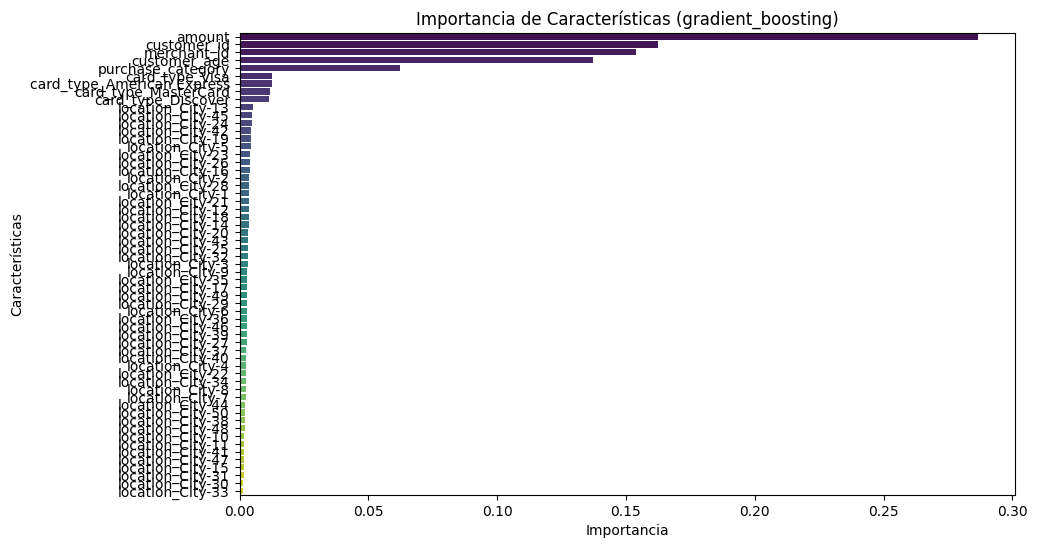

In [28]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

## XGBOOST

In [29]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "is_fraudulent",train_size=0.8)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid=None, cross_validation = 5,scoring="accuracy", ruta_guardar_modelo = "../pickles_general",nombre_modelo_guardar="mejor_modeloXGB.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [30]:
modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

,accuracy,precision,recall,f1,kappa,auc
train,0.71,0.71,0.71,0.70,0.41,0.78
test,0.50,0.50,0.50,0.50,-0.00,0.51


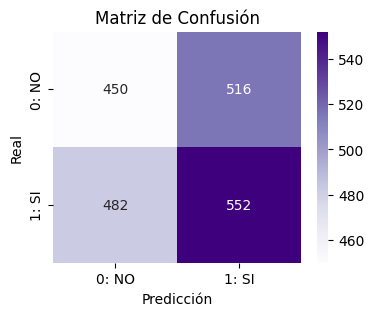

In [31]:
modelos_clasificacion.plot_matriz_confusion("xgboost", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

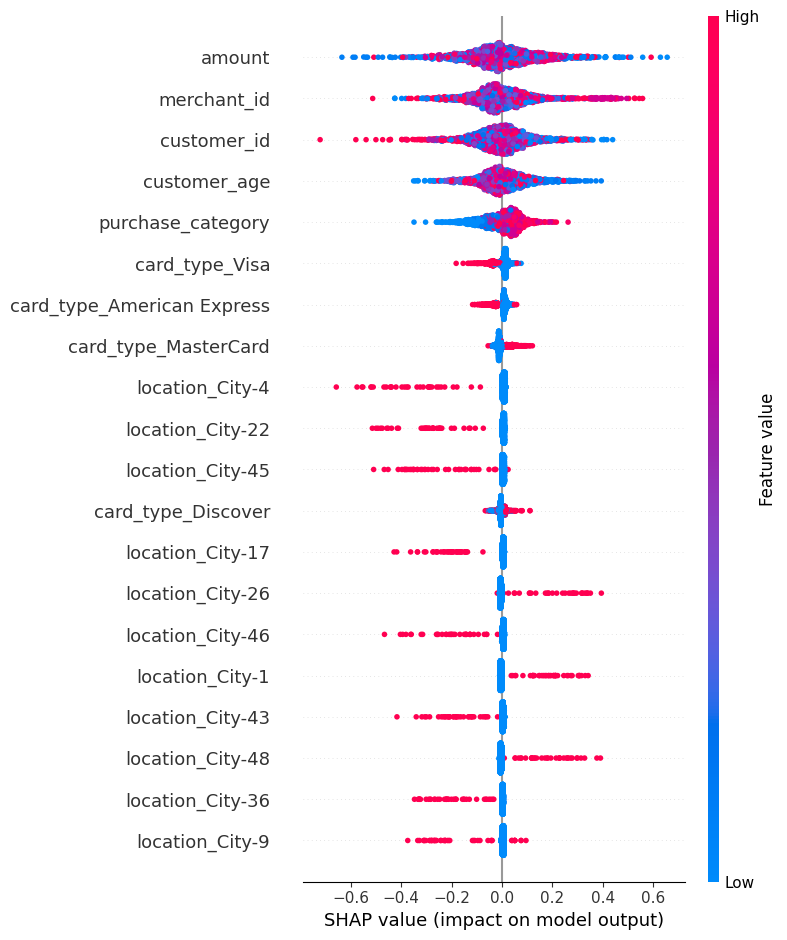

In [32]:
modelos_clasificacion.plot_shap_summary("xgboost")

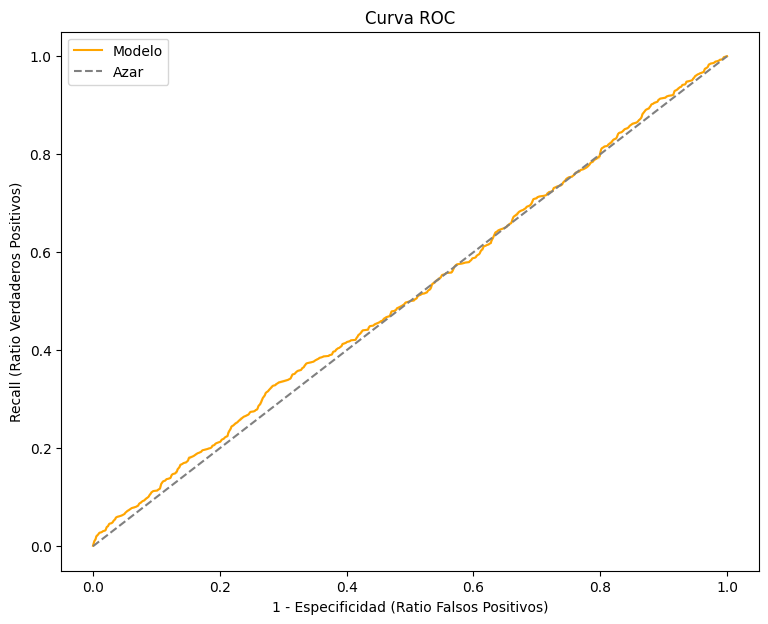

In [33]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

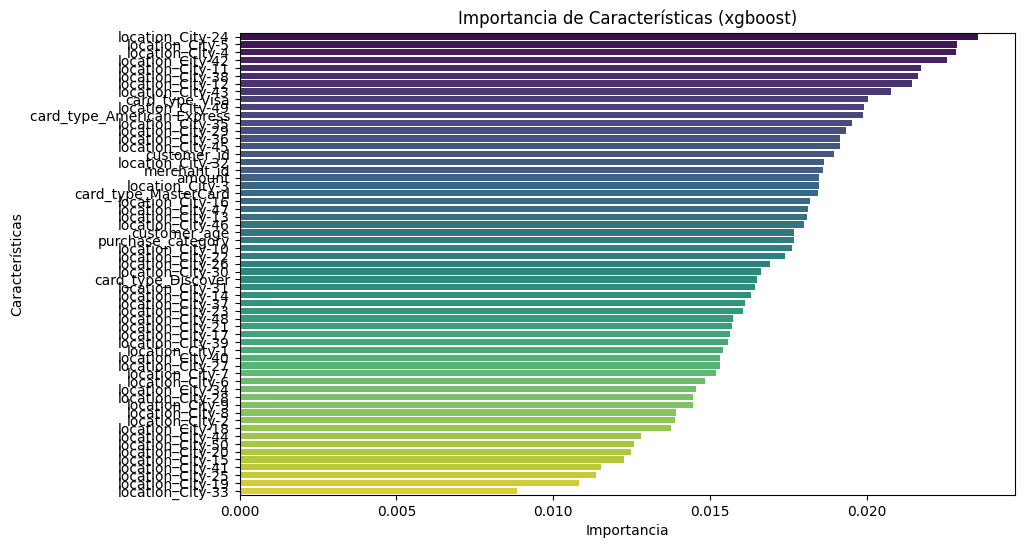

In [34]:
modelos_clasificacion.importancia_predictores("xgboost")

# Conclusión  
Por lo gneral no he conseguido buenas metricas en ningún modelo. Pero dado que hay que seleccionar uno priorizando la minimización del over fitting, la mayor lejanía al azar y el mayor Recall (porque preferimos falsos positivos a falsos negativos en la detección de anomalías fiscales). Finalmente lo mejores son la Regresión logística y el Decission Tree, especialmente este último por su ausencia absoluta de over fitting.